1. Building the TF-IDF matrix.
Following the steps in Project 1, transform the documents into TF-IDF vectors.
Use min_df = 3, exclude the stopwords (no need to do stemming or lemmatization).
QUESTION 1: Report the dimensions of the TF-IDF matrix you get.

In [5]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
np.random.seed(42)

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,
shuffle=True, random_state=42)

In [6]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
# seperate all data into two classes
labels = [1]*len(dataset.data)
for i in range(len(dataset.data)):
    if dataset.target[i] > 3:
        labels[i] = 0

# process data
def trim_data(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(temp[j])           
        data_list[i] = " ".join(ans)
        
trim_data(dataset.data)

# generate TF-IDF matrix
vectorizer = TfidfVectorizer(min_df=3, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(dataset.data)
print(X.shape)

(7882, 23135)


2. Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random_state, max_iter and n_init. Please use random_state=0, max_iter > 1000 and n_init > 30. Compare the clustering results with the known class labels. (you can refer to sklearn - Clustering text documents using k-means for a basic work flow)


(a) Given the clustering result and ground truth labels, contingency table A is the matrix whose entries Aij is the number of data points that belong to both the class Ci the cluster Kj .

QUESTION 2: Report the contingency table of your clustering result.

In [18]:
import matplotlib.pyplot as plt
def plot_contingency_table(cm, title):
    plt.imshow(cm, interpolation='nearest', cmap='GnBu')
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(actual_class_names))
    plt.xticks(tick_marks, actual_class_names)
    plt.yticks(tick_marks, cluster_class_names)
    
    plt.ylabel('Cluster Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.savefig(title+'.png')


contingency table:
[[1682 2297]
 [   3 3900]]


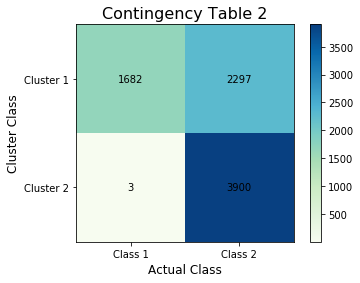

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix

# K-Means Clustering
km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
km.fit(X)

# Print results
contingency = contingency_matrix(labels, km.labels_)

print('contingency table:')
print(contingency)
plt.figure()
title = 'Contingency Table 2'
plot_contingency_table(contingency, title)
plt.show()
print()

b)In order to evaluate clustering results, there are various measures for a given partition of the data points with respect to the ground truth. We will use the measures homogeneity score, completeness score, V-measure, adjusted Rand score and adjusted mutual info score, all of which can be calculated by the corresponding functions provided in
sklearn.metrics

QUESTION 3:
Report the 5 measures above for the K-means clustering results you get.

In [15]:
print('Homogeneity:', metrics.homogeneity_score(labels, km.labels_))
print('Completeness:', metrics.completeness_score(labels, km.labels_)) 
print('V-measure:', metrics.v_measure_score(labels, km.labels_)) 
print('Adjusted Rand Score:', metrics.adjusted_rand_score(labels, km.labels_)) 
print('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(labels, km.labels_)) 

Homogeneity: 0.2480861826246507
Completeness: 0.3313589810284791
V-measure: 0.28373896215987654
Adjusted Rand Score: 0.17328640818785399
Adjusted Mutual Info Score: 0.24801733618150645


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
